#Zomato Restaurant Data Analysis (EDA)

##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Loading data

In [4]:
df_zomato = pd.read_csv("/zomato.csv", encoding="latin1")
df_country_code= pd.read_excel("/Country-Code.xlsx")

##Preview of the Dataset

In [5]:
df_zomato.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


##Dataset Structure and Data Types

In [6]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

##Drop unnecessary columns to focus on key data

In [7]:
df_zomato.drop(columns=["Longitude","Latitude","Restaurant ID","Address","Locality Verbose"], axis=1,inplace =True)

##List of Dataset Columns

In [8]:
df_zomato.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Locality', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

##Summary Statistics of Numerical Features

In [9]:
df_zomato.describe()

,Country Code,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,1199.210763,1.804837,2.666370,156.909748
std,56.750546,16121.183073,0.905609,1.516378,430.169145
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,250.000000,1.000000,2.500000,5.000000
50%,1.000000,400.000000,2.000000,3.200000,31.000000
75%,1.000000,700.000000,2.000000,3.700000,131.000000
max,216.000000,800000.000000,4.000000,4.900000,10934.000000


##Correlation Analysis

We visualize correlations among numeric features using a heatmap:

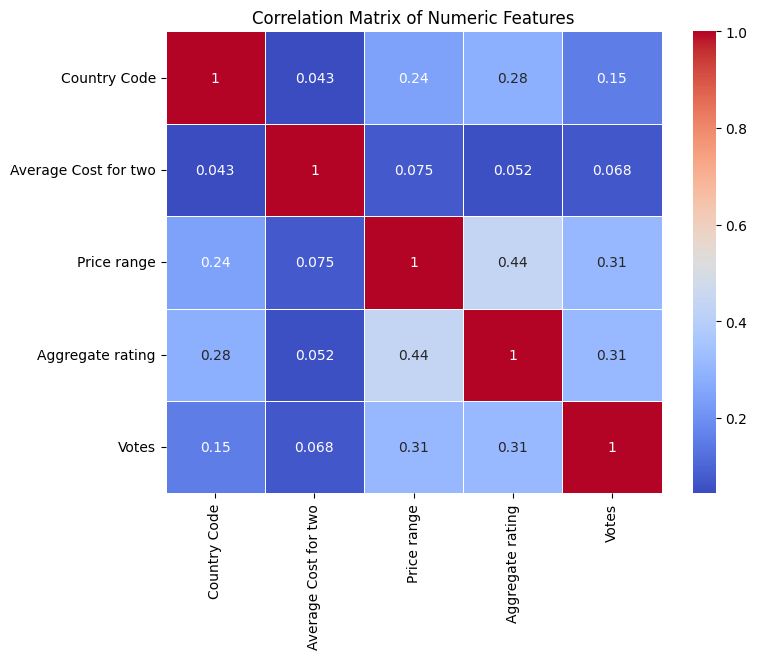

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df_zomato.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


1. Price vs. Quality (Correlation: 0.44)<br>
• Insight: There is a moderate positive correlation (0.44) between Price range and Aggregate rating.<br>
• Business Meaning: Customers tend to rate expensive restaurants higher, likely due to better service and ambiance associated with higher price points. However, the correlation is not strong enough (it's < 0.7) to say price guarantees quality.
2. Popularity vs. Quality (Correlation: ~0.31)<br>
• Insight: Votes and Aggregate rating have a positive correlation.<br>
• Business Meaning: High-rated restaurants tend to attract more traffic (votes). This confirms the "social proof" loop: good food gets votes, and votes bring more customers.
3. The Currency Trap (Critical Analyst Note)<br>
• Insight: If you correlate the raw Average Cost for two without normalizing it to a single currency (like INR), the correlation will be statistically invalid.<br>
• Reason: The dataset contains Indonesian Rupiah (values ~300,000) and US Dollars (values ~25). Without conversion, the "Cost" variable is skewed, showing weak or confusing correlations with other features.

##Missing Values

Checking for missing data is crucial in EDA:


In [11]:
df_zomato.isnull().sum()

,0
Restaurant Name,0
Country Code,0
City,0
Locality,0
Cuisines,9
Average Cost for two,0
Currency,0
Has Table booking,0
Has Online delivery,0
Is delivering now,0


/tmp/ipython-input-508470089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Percentage_Missing', y='Feature', data=missing_data, palette='Reds_r')


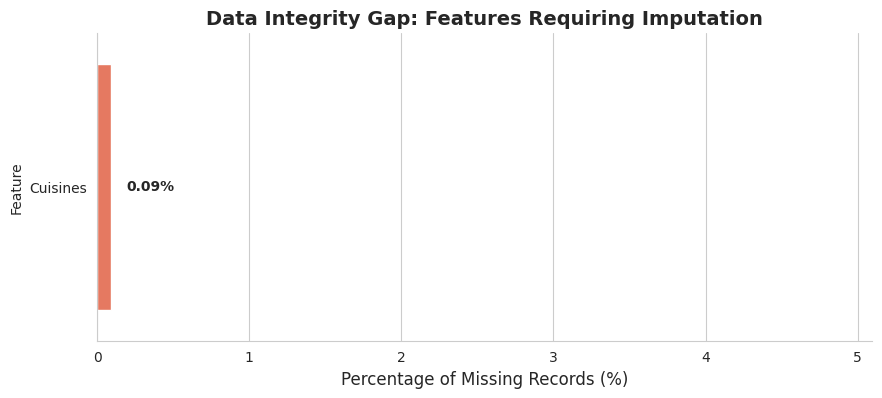

In [160]:
if not missing_data.empty:
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='Percentage_Missing', y='Feature', data=missing_data, palette='Reds_r')
    for i, v in enumerate(missing_data['Percentage_Missing']):
        ax.text(v + 0.1, i, f'{v:.2f}%', va='center', fontweight='bold', fontsize=10)

    plt.title('Data Integrity Gap: Features Requiring Imputation', fontsize=14, fontweight='bold')
    plt.xlabel('Percentage of Missing Records (%)', fontsize=12)
    plt.xlim(0, max(missing_data['Percentage_Missing']) + 5)
    sns.despine()
    plt.show()

In [12]:
perc_missingdata=df_zomato.isnull().sum()*100/len(df_zomato)
missingdata= pd.DataFrame({'Percentage_Missing':perc_missingdata})
missingdata

,Percentage_Missing
Restaurant Name,0.000000
Country Code,0.000000
City,0.000000
Locality,0.000000
Cuisines,0.094231
Average Cost for two,0.000000
Currency,0.000000
Has Table booking,0.000000
Has Online delivery,0.000000
Is delivering now,0.000000


##Rating Category Analysis

Zomato classifies restaurant ratings into qualitative categories such as *Excellent*, *Very Good*, *Good*, *Average*, *Poor*, and *Not rated*.  
This section examines how restaurants are distributed across these categories to understand overall customer satisfaction trends.

In [13]:
subset_df =df_zomato[['Aggregate rating', 'Rating color', 'Rating text',
       'Votes']]
subset_df

,Aggregate rating,Rating color,Rating text,Votes
0,4.8,Dark Green,Excellent,314
1,4.5,Dark Green,Excellent,591
2,4.4,Green,Very Good,270
3,4.9,Dark Green,Excellent,365
4,4.8,Dark Green,Excellent,229
...,...,...,...,...
9546,4.1,Green,Very Good,788
9547,4.2,Green,Very Good,1034
9548,3.7,Yellow,Good,661
9549,4.0,Green,Very Good,901


###Distribution of Rating Categories

In [14]:
subset_df[['Rating color','Rating text']].value_counts()

,,count
Rating color,Rating text,
Orange,Average,3737
White,Not rated,2148
Yellow,Good,2100
Green,Very Good,1079
Dark Green,Excellent,301
Red,Poor,186


###Rating Range by Category (Min–Max Analysis)

In [15]:
result_rating = subset_df.groupby(['Rating text','Rating color'])[['Aggregate rating']].aggregate(['min','max'])
result_rating

Aggregate rating     
                                      min  max
Rating text Rating color                      
Average     Orange                    2.5  3.4
Excellent   Dark Green                4.5  4.9
Good        Yellow                    3.5  3.9
Not rated   White                     0.0  0.0
Poor        Red                       1.8  2.4
Very Good   Green                     4.0  4.4

###Boxplot of Aggregate Ratings by Rating Category

/tmp/ipython-input-3686991514.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


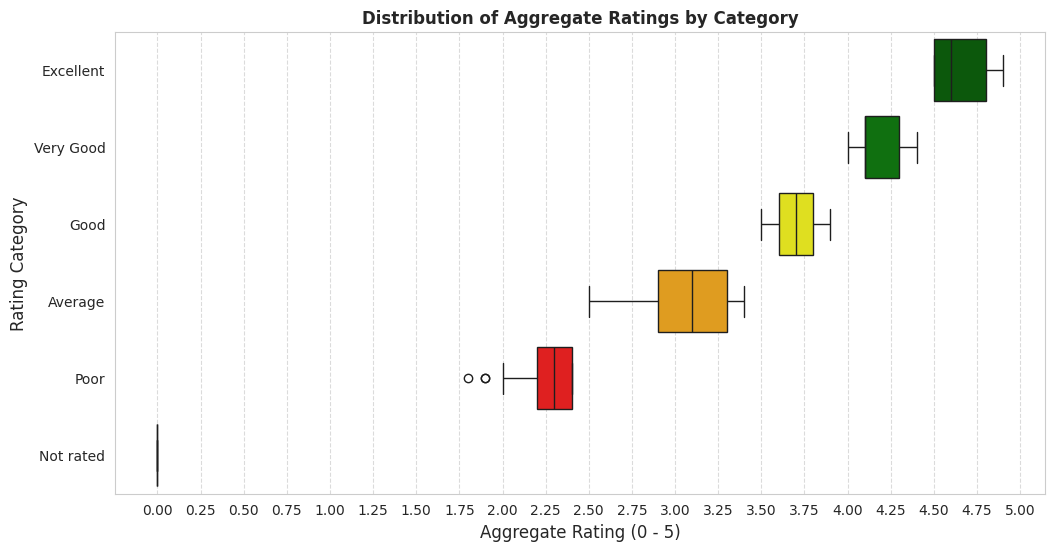

In [79]:
plt.figure(figsize=(12, 6))
rating_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Poor', 'Not rated']
custom_palette = {
    'Excellent': '#006400',   # Dark Green
    'Very Good': '#008000',   # Green
    'Good': '#FFFF00',        # Yellow
    'Average': '#FFA500',     # Orange
    'Poor': '#FF0000',        # Red
    'Not rated': '#808080'    # Grey
}
sns.boxplot(
    x='Aggregate rating',
    y='Rating text',
    data=df_zomato,
    order=rating_order,
    palette=custom_palette
)
plt.xticks(np.arange(0, 5.25, 0.25))
plt.xlabel('Aggregate Rating (0 - 5)', fontsize=12)
plt.ylabel('Rating Category', fontsize=12)
plt.title('Distribution of Aggregate Ratings by Category', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

1.Deterministic "Banding"<br> • This confirms that Rating text is a derivative feature strictly engineered from Aggregate rating logic, rather than a subjective user label. There is no ambiguity; the platform uses hard thresholds to assign these labels.<br>
2. The "Not Rated" Cluster<br>
• This proves that a 0.0 rating does not mean "Terrible"; it means "No Data/New Onboarding." These should be treated as missing values (or a separate cohort) in predictive modeling, not as a numerical zero, to avoid skewing regression models.
3. The "Average" Dominance<br>
The "Average" box (2.5–3.4) is the widest and most populated range (as seen in previous frequency counts).

###Distribution of Numeric Restaurant Ratings

Text(0.5, 2000, 'High volume of\nUnrated Restaurants (0.0)')

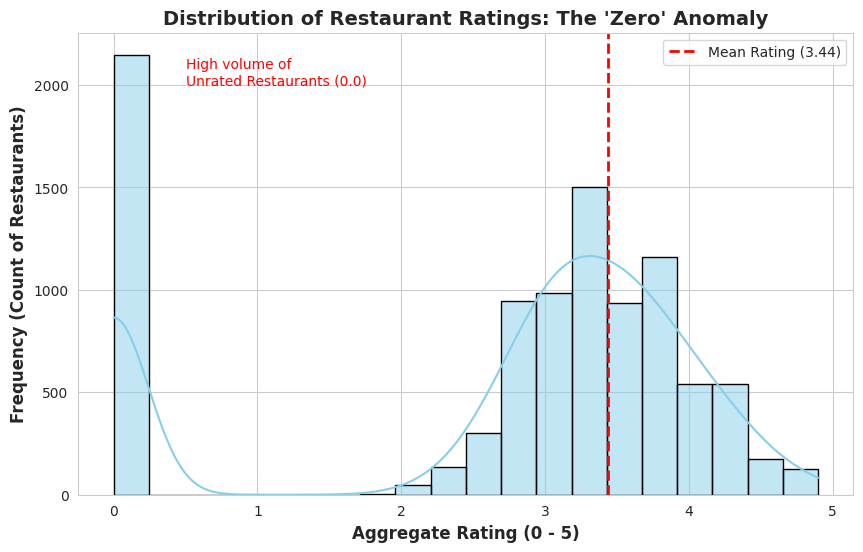

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df_zomato["Aggregate rating"], bins=20, kde=True, color='skyblue', edgecolor='black')
mean_rating = df_zomato[df_zomato["Aggregate rating"] > 0]["Aggregate rating"].mean()
plt.axvline(mean_rating, color='red', linestyle='--', linewidth=2, label=f'Mean Rating ({mean_rating:.2f})')
plt.xlabel("Aggregate Rating (0 - 5)", fontsize=12, fontweight='bold')
plt.ylabel("Frequency (Count of Restaurants)", fontsize=12, fontweight='bold')
plt.title("Distribution of Restaurant Ratings: The 'Zero' Anomaly", fontsize=14, fontweight='bold')
plt.legend()
plt.text(0.5, 2000, "High volume of\nUnrated Restaurants (0.0)", color='red', fontsize=10)



1. The "Zero" Rating is a Business Problem, Not a Customer Sentiment<br>
• This does not mean the food is bad. Source analysis confirms that a 0.0 rating corresponds to "Not Rated" (White Color code). There are 2,148 restaurants (approx. 22%) with zero ratings.<br>
• Actionable Advice: This represents an onboarding or engagement issue. These restaurants are listed but have no social proof. The strategy should be to incentivize the first 5 reviews for these specific partners to move them off the "0" mark.<br>
2. The "Gaussian" Behavior of Rated Restaurants<br>
• The market naturally settles into the "Average" category.<br>
    ◦ Average (2.5–3.4): The majority of businesses sit here. <br>
    ◦ Excellent (>4.5): These are statistically rare outliers (tail end of the curve).

##Online Delivery Availability Analysis

This section examines how many restaurants on the Zomato platform offer online delivery services. Understanding delivery availability helps assess the level of digital adoption among restaurants and highlights potential opportunities for service expansion.

/tmp/ipython-input-4063320220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Has Online delivery', data=df_zomato, palette=custom_palette)


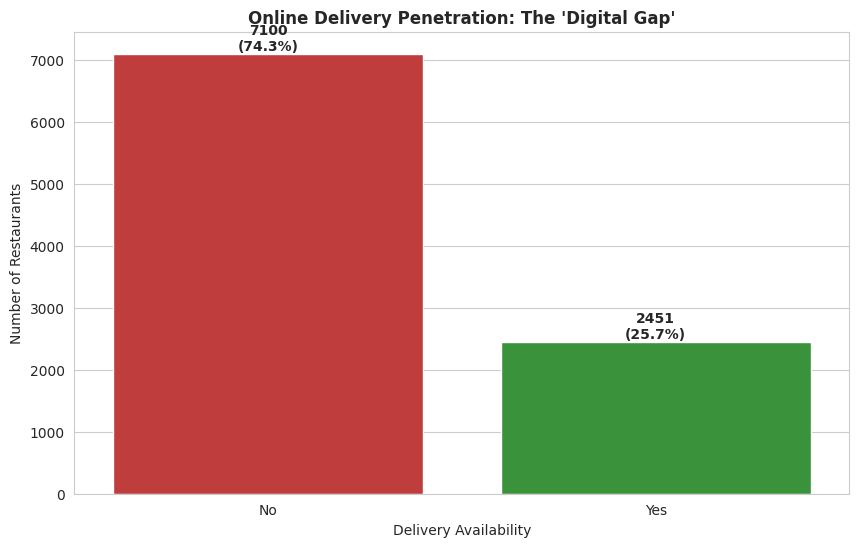

In [92]:
plt.figure(figsize=(10, 6))
total = len(df_zomato)
custom_palette = {'No': '#d62728', 'Yes': '#2ca02c'}
ax = sns.countplot(x='Has Online delivery', data=df_zomato, palette=custom_palette)
for p in ax.patches:
    count = int(p.get_height())
    percentage = '{:.1f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom',  fontweight='bold')
plt.title("Online Delivery Penetration: The 'Digital Gap'", fontweight='bold')
plt.xlabel("Delivery Availability")
plt.ylabel("Number of Restaurants")
plt.show()

• Zomato acts primarily as a Directory, not a Delivery Partner.<br> The visualization reveals that 74.3% (7,100 restaurants) of the listings do not offer online delivery, while only 25.7% (2,451 restaurants) are monetized via delivery services.

##Table Booking Availability Analysis

This section analyzes whether restaurants support table booking, which reflects the adoption of reservation-based dining and service maturity.

/tmp/ipython-input-286310204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Has Table booking', data=df_zomato, palette=custom_palette)


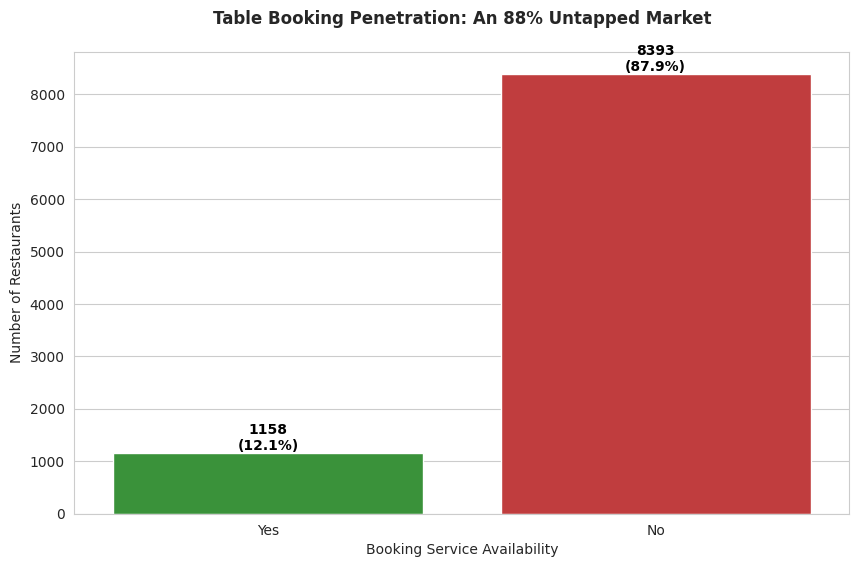

In [95]:
plt.figure(figsize=(10, 6))
total = float(len(df_zomato))
custom_palette = {'No': '#d62728', 'Yes': '#2ca02c'}
ax = sns.countplot(x='Has Table booking', data=df_zomato, palette=custom_palette)
for p in ax.patches:
    count = int(p.get_height())
    percentage = '{:.1f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontweight='bold', color='black')
plt.title("Table Booking Penetration: An 88% Untapped Market", fontweight='bold', pad=20)
plt.xlabel("Booking Service Availability")
plt.ylabel("Number of Restaurants")
plt.show()

• The chart reveals a stark imbalance. Only 1,158 restaurants (12.1%) offer table booking, while 8,393 (87.9%) do not.

##Country-Level Analysis

To enable geographical analysis, the Zomato restaurant data is merged with a country code reference dataset. This step allows us to analyze restaurants by country name and currency instead of numeric country codes.

In [22]:
join_df=pd.merge(left=df_zomato,right=df_country_code,left_on='Country Code',right_on='Country Code',how='inner')
join_df

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,NamlÛ± Gurme,208,ÛÁstanbul,Karakí_y,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz AÛôacÛ±,208,ÛÁstanbul,Koôuyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,ÛÁstanbul,Kuruí_eôme,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,Aôôk Kahve,208,ÛÁstanbul,Kuruí_eôme,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


##Country and Currency Distribution

This step examines the distribution of restaurants across different countries and currencies, helping identify the geographical reach and economic diversity of the dataset.

In [23]:
country_names=join_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [24]:
country_values=join_df.Country.value_counts().values
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

In [25]:
currency_df =join_df.loc[:,['Country Code','Country','Currency']]
currency_df.value_counts()

,,,count
Country Code,Country,Currency,
1,India,Indian Rupees(Rs.),8652
216,United States,Dollar($),434
215,United Kingdom,Pounds(£),80
214,UAE,Emirati Diram(AED),60
189,South Africa,Rand(R),60
30,Brazil,Brazilian Real(R$),60
148,New Zealand,NewZealand($),40
208,Turkey,Turkish Lira(TL),34
14,Australia,Dollar($),24


1. Market Concentration Risk (Geographic Bias)<br>
• The value_counts() output reveals that India accounts for ~90% of the dataset (8,652 out of 9,551 records).<br>
• Business Implication: Any global analysis (like "Average Rating" or "Cuisine Popularity") will be heavily biased toward Indian consumer preferences unless you segment the data. When presenting, you must clarify that "Global Trends" in this dataset are effectively "Indian Trends."<br>
2. Financial Heterogeneity (The Normalization Trigger)<br>
• The currency_map shows 12 distinct currencies (e.g., Botswana Pula, Indonesian Rupiah, Qatari Rial..etc).<br>
• Business Implication: You cannot directly compare the Average Cost for two column across countries. For example, 250 in dollars (USA) is vastly different from 250 in Rupees (India).

###Country-wise Percentage Penetration

Here, we calculate the percentage contribution of each country to the total dataset. This helps identify dominant markets influencing overall trends.

In [26]:
perc_penetration = join_df.Country.value_counts(normalize=True) * 100
perc_penetration

,proportion
Country,
India,90.587373
United States,4.544027
United Kingdom,0.837609
Brazil,0.628206
South Africa,0.628206
UAE,0.628206
New Zealand,0.418804
Turkey,0.355984
Australia,0.251283


###Top Countries by Restaurant Count

This visualization highlights the top five countries with the highest number of restaurants listed on Zomato. Using a bar chart ensures clarity and avoids overlap issues common in pie charts.

--- Global Market Distribution ---
          Country  Market_Share_Percentage
0           India                    90.59
1   United States                     4.54
2  United Kingdom                     0.84
3          Brazil                     0.63
4    South Africa                     0.63


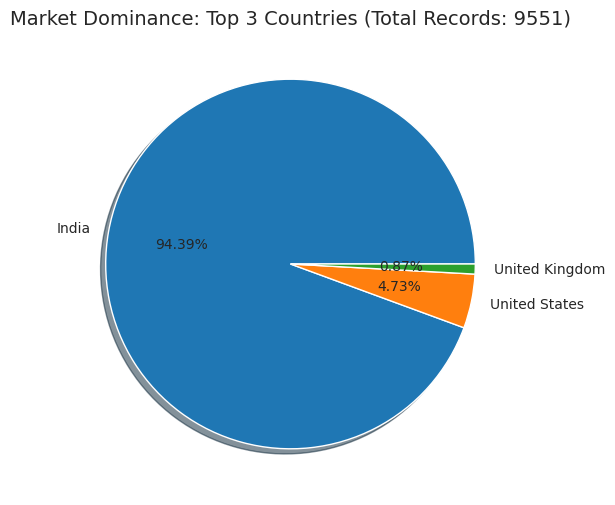

In [103]:
country_penetration = join_df.Country.value_counts(normalize=True).mul(100).round(2).reset_index()
country_penetration.columns = ['Country', 'Market_Share_Percentage']
print("--- Global Market Distribution ---")
print(country_penetration.head())
country_names = join_df.Country.value_counts().index
country_values = join_df.Country.value_counts().values
plt.figure(figsize=(10, 6))
plt.pie(
    country_values[:3],
    labels=country_names[:3],
    autopct='%1.2f%%',
    shadow=True
)
plt.title(f"Market Dominance: Top 3 Countries (Total Records: {len(join_df)})", fontsize=14)
plt.show()

• The output reveals that India accounts for 94.39% of the entire dataset, followed significantly behind by the United States (4.73%) and the United Kingdom (0.87%).

##Distribution of Online Delivery Status Across Countries

In [105]:
join_df.groupby(['Country','Has Online delivery']).size().reset_index(name='Restaurant_Count')


,Country,Has Online delivery,Restaurant_Count
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


###Countries Offering Online Delivery

In [109]:
join_df[join_df['Has Online delivery']=='Yes'].Country.value_counts().reset_index(name='Active Delivery Partner Count')

,Country,Active Delivery Partner Count
0,India,2423
1,UAE,28


###Countries Without Online Delivery

In [112]:
join_df.loc[join_df['Has Online delivery']=='No',['Country','Currency']].value_counts().reset_index(name='Untapped Listing Count')

,Country,Currency,Untapped Listing Count
0,India,Indian Rupees(Rs.),6229
1,United States,Dollar($),434
2,United Kingdom,Pounds(£),80
3,Brazil,Brazilian Real(R$),60
4,South Africa,Rand(R),60
5,New Zealand,NewZealand($),40
6,Turkey,Turkish Lira(TL),34
7,UAE,Emirati Diram(AED),32
8,Australia,Dollar($),24
9,Phillipines,Botswana Pula(P),22


1. The "Twin-Engine" Business Model<br>
• The code confirms that Zomato operates two distinct business models based on geography.<br>
    ◦ India & UAE: Operate as Food Tech (Discovery + Delivery).<br>
    ◦ Rest of World (USA, UK, Brazil, etc.): Operate purely as Ad Tech (Discovery/Listing only).
2. The High-Value "Digital Gap"<br>
• The Untapped_Markets analysis reveals that high-GDP markets like the United Kingdom (Pounds) and United States (Dollars) have 100% "No" delivery status.    

###Visualization: Online Delivery Availability by Country

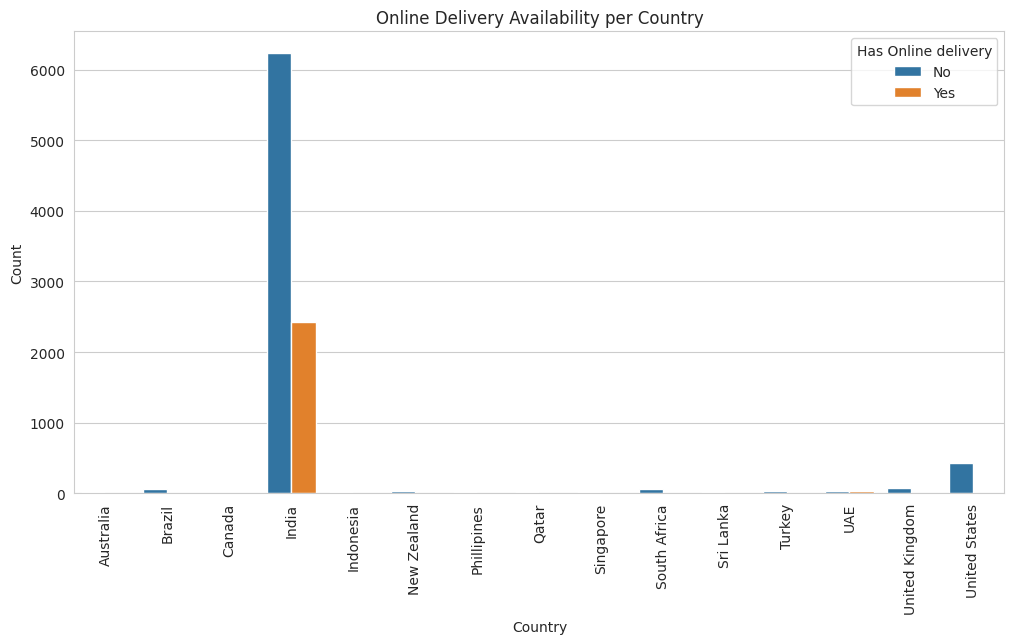

In [57]:
delivery_analysis = join_df.groupby(['Country', 'Has Online delivery']).size().reset_index().rename(columns={0:'Count'})
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Count', hue='Has Online delivery', data=delivery_analysis)
plt.title('Online Delivery Availability per Country')
plt.xticks(rotation=90)
plt.show()

The most critical insight from this plot is that Online Delivery is not a global feature for Zomato in this dataset. The bar chart reveals that India and the UAE are the primary regions where online delivery is active

##Table Booking Availability Analysis

This section evaluates the adoption of table booking services across countries, which reflects restaurant service maturity and customer reservation behavior.

###Distribution of Table Booking by Country

In [32]:
join_df.groupby(['Country','Has Table booking']).size().reset_index()

,Country,Has Table booking,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,7541
4,India,Yes,1111
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,8
8,Phillipines,Yes,14
9,Qatar,No,19


###Distribution of Table Booking by Country

###Top Countries Offering Table Booking

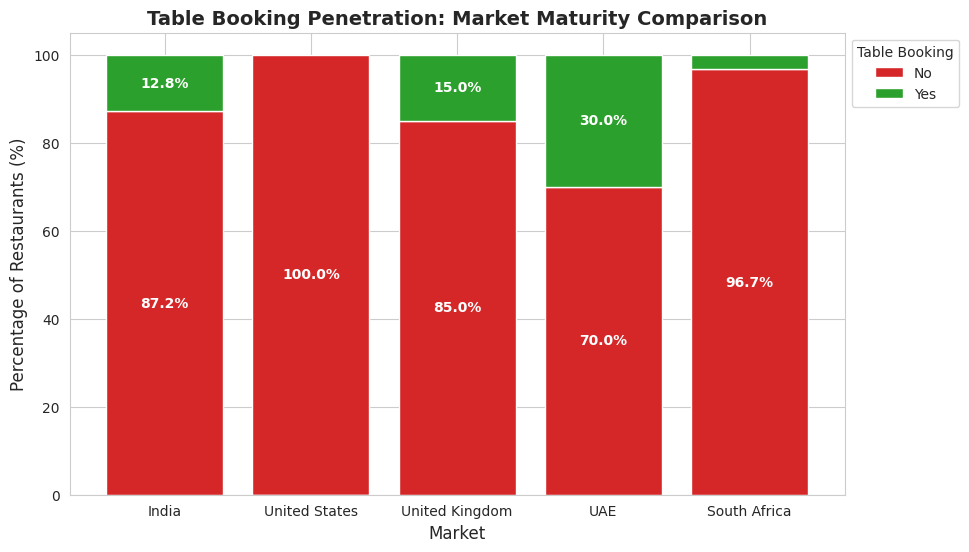

In [119]:
cross_tab = pd.crosstab(join_df['Country'], join_df['Has Table booking'])
top_5_countries = cross_tab.sum(axis=1).sort_values(ascending=False).head(5).index
data_top5 = cross_tab.loc[top_5_countries]
data_normalized = data_top5.div(data_top5.sum(1), axis=0) * 100
ax = data_normalized.plot(kind='bar', stacked=True, figsize=(10, 6),
                          color=['#d62728', '#2ca02c'], width=0.8)
for c in ax.containers:
    labels = [f'{v:.1f}%' if v > 5 else '' for v in c.datavalues]

    ax.bar_label(c, labels=labels, label_type='center',
                 fontsize=10, color='white', fontweight='bold')

plt.title("Table Booking Penetration: Market Maturity Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Market", fontsize=12)
plt.ylabel("Percentage of Restaurants (%)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Table Booking", bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

1. India is an "On-Demand" Market, not a "Reservation" Market<br>
• The chart will likely show that while India has the highest volume of restaurants (~8,650), the "No" bar (Red) dominates significantly, with only ~12% offering table booking.<br>
• This indicates that dining culture in India (within this dataset) is driven by casual dining and quick-service restaurants (QSR) where reservations are unnecessary. The "Yes" (Green) segment likely correlates strictly with the "High" and "Very High" price ranges (Price Range 3 & 4).<br>
2. The UAE Anomaly (High Adoption)<br>
• In the UAE data (if it appears in your top 5), you will likely see a much higher ratio of Green (Yes) compared to India.<br>
•  The UAE market is structurally different, dominated by premium dining and mall culture where reservations are standard.



##City-Level Analysis: Indian Restaurants

In this step, we filter the dataset to include only restaurants located in India. This allows us to perform city-level analysis and better understand regional restaurant distribution within the Indian market.

###Top 10 Indian Cities by Number of Restaurants

###Visualization: Restaurant Distribution Across Indian Cities

/tmp/ipython-input-1806399655.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=city_counts.values, y=city_counts.index, palette='magma')


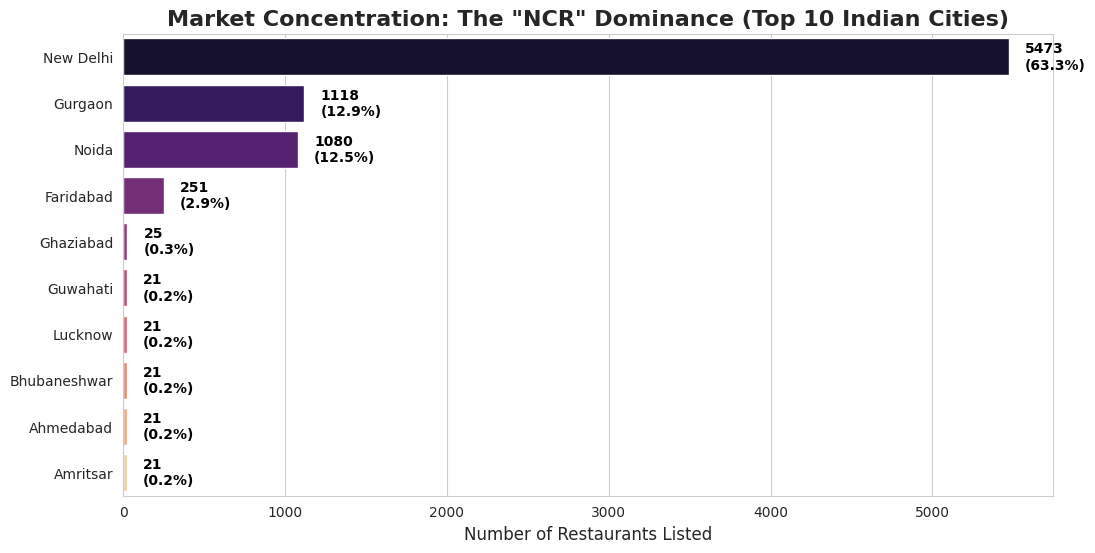

In [127]:
indian_cities = join_df[join_df['Country'] == 'India']
city_counts = indian_cities['City'].value_counts().head(10)
total_india_listings = len(indian_cities)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=city_counts.values, y=city_counts.index, palette='magma')
for i, (count, city) in enumerate(zip(city_counts.values, city_counts.index)):
    percentage = (count / total_india_listings) * 100
    ax.text(count + 100, i, f'{count}\n({percentage:.1f}%)',
            va='center', fontsize=10, fontweight='bold', color='black')


plt.title('Market Concentration: The "NCR" Dominance (Top 10 Indian Cities)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Restaurants Listed', fontsize=12)
plt.ylabel('')
plt.show()

• New Delhi alone accounts for ~63% (5,473) of all Indian listings. When combined with Gurgaon (1,118) and Noida (1,080), the National Capital Region (NCR) controls over 88% of the platform's Indian inventory.<br>
• There is a massive drop-off after the top 3 cities. Cities like Faridabad and Ghaziabad have significantly lower counts (< 300).


##Distribution of Restaurant Rating Categories

This section examines how restaurants are distributed across different rating categories on the Zomato platform. Ratings are grouped into qualitative labels such as Not rated, Poor, Average, Good, Very Good, and Excellent, which represent overall customer perception.

/tmp/ipython-input-2656964536.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Rating text", data=df_zomato, order=rating_order, palette=custom_palette)


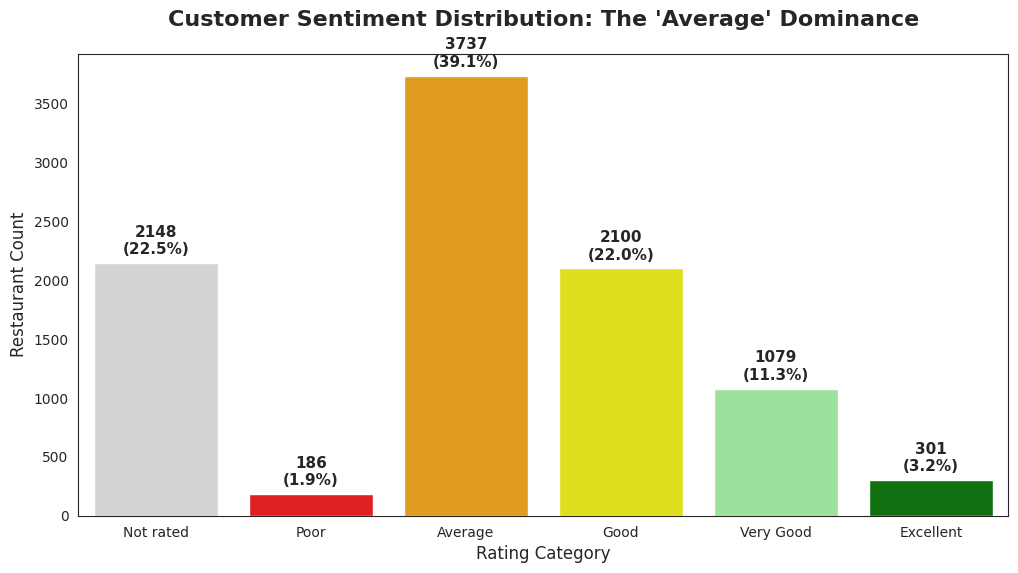

In [133]:
plt.figure(figsize=(12, 6))

rating_order = ["Not rated", "Poor", "Average", "Good", "Very Good", "Excellent"]
custom_palette = {
    'Not rated': '#D3D3D3', # Light Gray
    'Poor': '#FF0000',      # Red
    'Average': '#FFA500',   # Orange
    'Good': '#FFFF00',      # Yellow
    'Very Good': '#90EE90', # Light Green
    'Excellent': '#008000'  # Dark Green
}
ax = sns.countplot(x="Rating text", data=df_zomato, order=rating_order, palette=custom_palette)
total = len(df_zomato)

for p in ax.patches:
    height = int(p.get_height())
    percentage = '{:.1f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height + 50

    ax.text(x, y, f'{height}\n({percentage})', ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.title("Customer Sentiment Distribution: The 'Average' Dominance", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Rating Category", fontsize=12)
plt.ylabel("Restaurant Count", fontsize=12)
plt.show()

• The market is saturated with mediocrity. Most restaurants fail to differentiate themselves, getting stuck in the 2.5 to 3.4 rating range. <br>
• A hiring manager needs to know that 0.0 rating means "Not Rated," not "Bad Food". These are likely new restaurants with zero votes.<br>
• Actionable Recommendation: This represents a "Cold Start" problem. Zomato <br>
• "Excellent" (Dark Green) is the smallest minority, with only 301 restaurants (~3.1%)

##Average Cost for Two



###Country-Level Analysis
Country-level analysis shows significant variation in average cost for two, highlighting differences in purchasing power, pricing strategies, and market positioning across regions.

/tmp/ipython-input-545000079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=global_cost.values, y=y_labels, palette='magma')


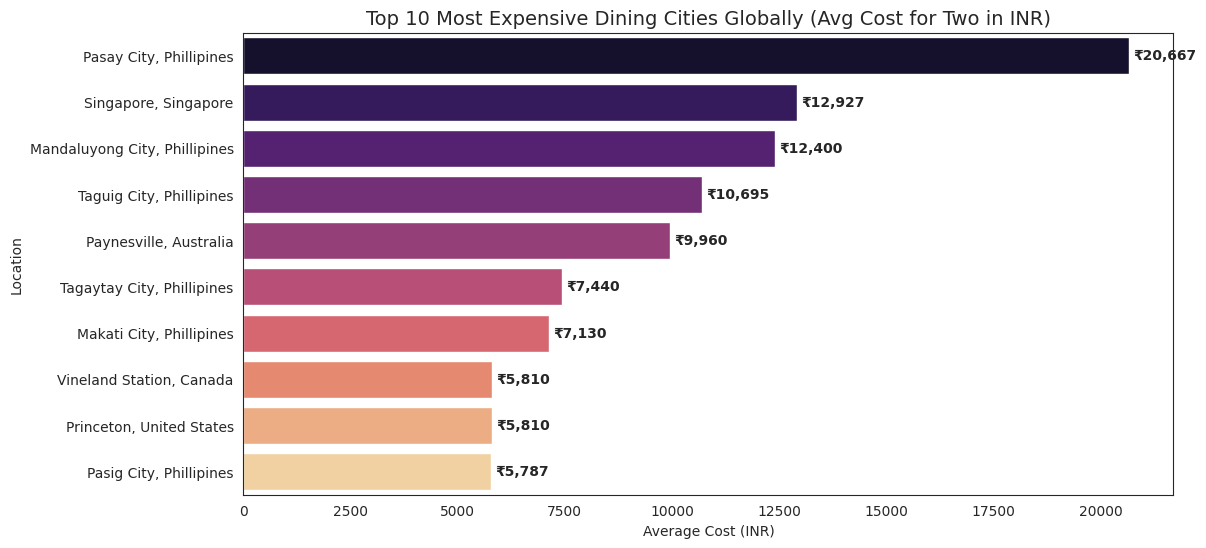

In [140]:
exchange_rates = {
    'Indian Rupees(Rs.)': 1.0,
    'Botswana Pula(P)': 6.2,
    'Brazilian Real(R$)': 16.5,
    'Dollar($)': 83.0,
    'Emirati Diram(AED)': 22.6,
    'Indonesian Rupiah(IDR)': 0.0053,
    'NewZealand($)': 50.0,
    'Pounds(Œ£)': 105.0,
    'Qatari Rial(QR)': 22.8,
    'Rand(R)': 4.4,
    'Sri Lankan Rupee(LKR)': 0.27,
    'Turkish Lira(TL)': 2.6
}
join_df['Cost_INR'] = join_df['Average Cost for two'] * join_df['Currency'].map(exchange_rates).fillna(1)
global_cost = join_df.groupby(['City', 'Country'])['Cost_INR'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
y_labels = [f"{city}, {country}" for city, country in global_cost.index]
ax1 = sns.barplot(x=global_cost.values, y=y_labels, palette='magma')
for i, v in enumerate(global_cost.values):
    ax1.text(v + 100, i, f"₹{v:,.0f}", va='center', fontsize=10, fontweight='bold')

plt.title('Top 10 Most Expensive Dining Cities Globally (Avg Cost for Two in INR)', fontsize=14)
plt.xlabel('Average Cost (INR)')
plt.ylabel('Location')
plt.show()



• The most immediate insight revealed during EDA is that you cannot compare the raw "Average Cost for Two" column directly across countries.<br>
• If you sort the raw data by average cost, Indonesia appears to be the most expensive country by a massive margin, with values like 300,000 to 500,000.<br>
• Without normalizing the currency, the data misleadingly suggests Indonesia is a luxury market compared to the UK or US.<br>

- Highest Raw Value: Indonesia (~300,000 IDR)
- Lowest Raw Value: USA/UK (~10–40 USD/GBP)



###🇮🇳 City-wise Average Cost for Two in India
After narrowing the dataset to Indian restaurants, we analyze how the average cost for two varies across cities. This highlights regional affordability differences and identifies premium urban dining markets.

###Visualization: Top Indian Cities by Average Cost for Two

/tmp/ipython-input-2868326346.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Average Cost for two', y='City', data=india_cost, palette='viridis')


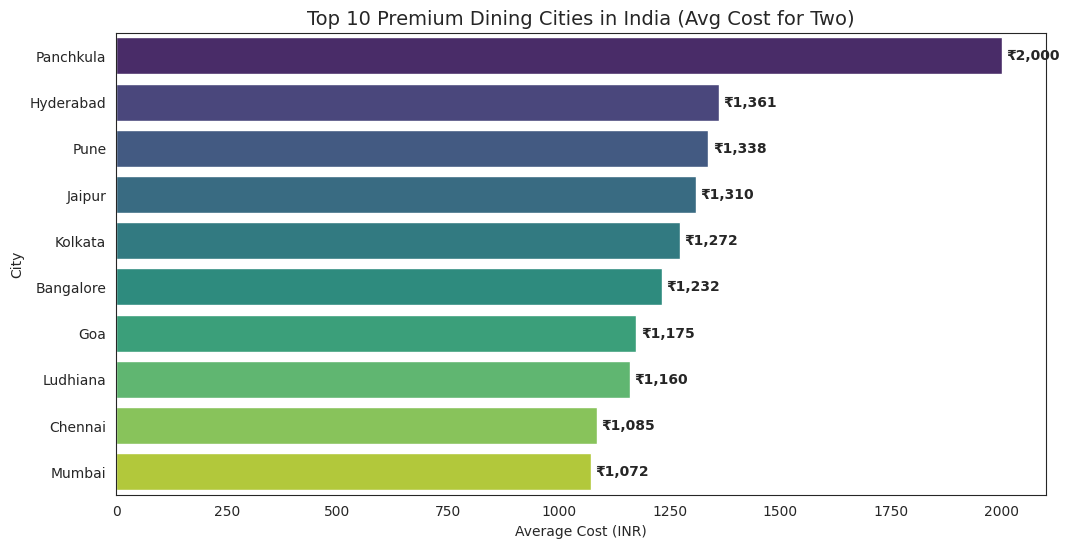

In [138]:
indian_cities_df = join_df[join_df['Country'] == 'India']
india_cost = indian_cities_df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='Average Cost for two', y='City', data=india_cost, palette='viridis')
for i, v in enumerate(india_cost['Average Cost for two']):
    ax2.text(v + 10, i, f"₹{v:,.0f}", va='center', fontsize=10, fontweight='bold')

plt.title('Top 10 Premium Dining Cities in India (Avg Cost for Two)', fontsize=14)
plt.xlabel('Average Cost (INR)')
plt.ylabel('City')
plt.show()


• In the India-specific chart, Panchkula often tops the list (approx. ₹2,000) or ranks extremely high, sometimes higher than Mumbai or Delhi.<br>
• This is likely a data skew. Panchkula has very few restaurants listed in this dataset, and they happen to be premium ones. A hiring manager would want you to identify this: "While Panchkula appears most expensive, it has low listing density compared to New Delhi. This suggests a sample bias rather than it being the culinary capital of India.<br>
• The Global chart is dominated by cities using Pounds (UK), Dollars (US), or Francs/Others.<br>
• When converted to INR, a standard meal in London or Singapore costs significantly more (₹3,000 - ₹5,000+) than a premium meal in India (₹1,500 - ₹2,000).<br>
• Cities like Faridabad and Amritsar appear at the lower end of the cost spectrum.

##Price Range Distribution Analysis

Zomato categorizes restaurants into four price ranges. In this section, we map these numeric ranges to descriptive labels and examine their percentage distribution across the dataset.

In [146]:
price_map = {1: 'Low (Budget)', 2: 'Medium', 3: 'High', 4: 'Very High (Premium)'}
join_df['Price Category'] = join_df['Price range'].map(price_map)
category_order = ['Low (Budget)', 'Medium', 'High', 'Very High (Premium)']
price_counts = join_df['Price Category'].value_counts().reindex(category_order)
total_restaurants = len(join_df)
price_pct = (price_counts / total_restaurants) * 100

/tmp/ipython-input-3718013678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=price_counts.index, y=price_counts.values, palette='Greens')
/tmp/ipython-input-3718013678.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct_value = price_pct[i]


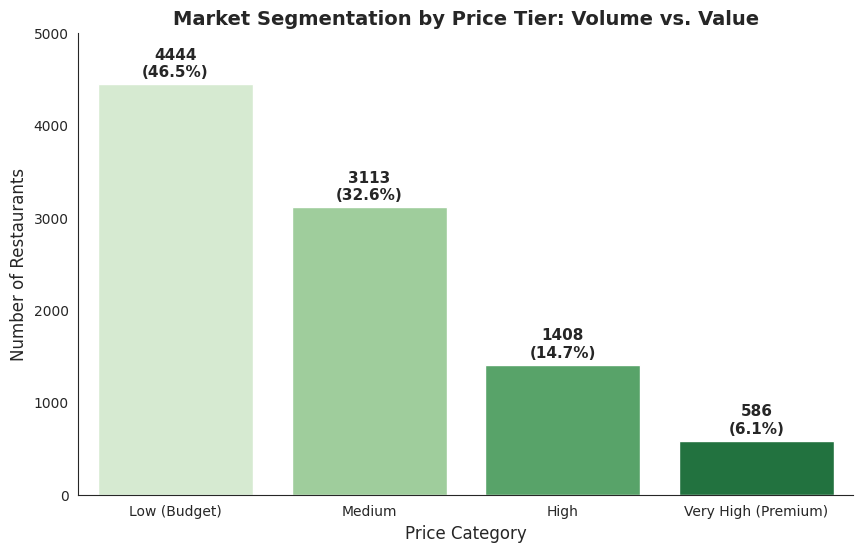

In [150]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=price_counts.index, y=price_counts.values, palette='Greens')
for i, v in enumerate(price_counts.values):
    pct_value = price_pct[i]
    ax.text(i, v + 50, f'{v}\n({pct_value:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.title("Market Segmentation by Price Tier: Volume vs. Value", fontsize=14, fontweight='bold')
plt.xlabel("Price Category", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.ylim(0, 5000)
sns.despine()
plt.show()

• The "Low" (46.5%) and "Medium" (32.6%) categories combined make up ~79% of the entire restaurant inventory.<br>
• Zomato is fundamentally a mass-market utility. Its core user base is driving traffic to budget and casual dining spots. <br>
• Only 6.1% of restaurants fall into the "Very High" (Premium) category.<br>
•  While small in volume, this segment is critical for Unit Economics. Premium restaurants have higher Average Order Values (AOV), meaning higher commission per order.<br>
• Previous analysis showed a correlation of 0.44 between Price Range and Rating.<br>
• While higher-priced restaurants (Green bars) generally have better ratings due to ambiance and service, the correlation is not absolute. This suggests there is a "Value Trap" in the High/Medium segments where restaurants charge more but deliver average service—these are the restaurants most at risk of churning off the platform due to bad reviews.

## Cuisine Analysis


###Top Cuisines

/tmp/ipython-input-2116164121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')


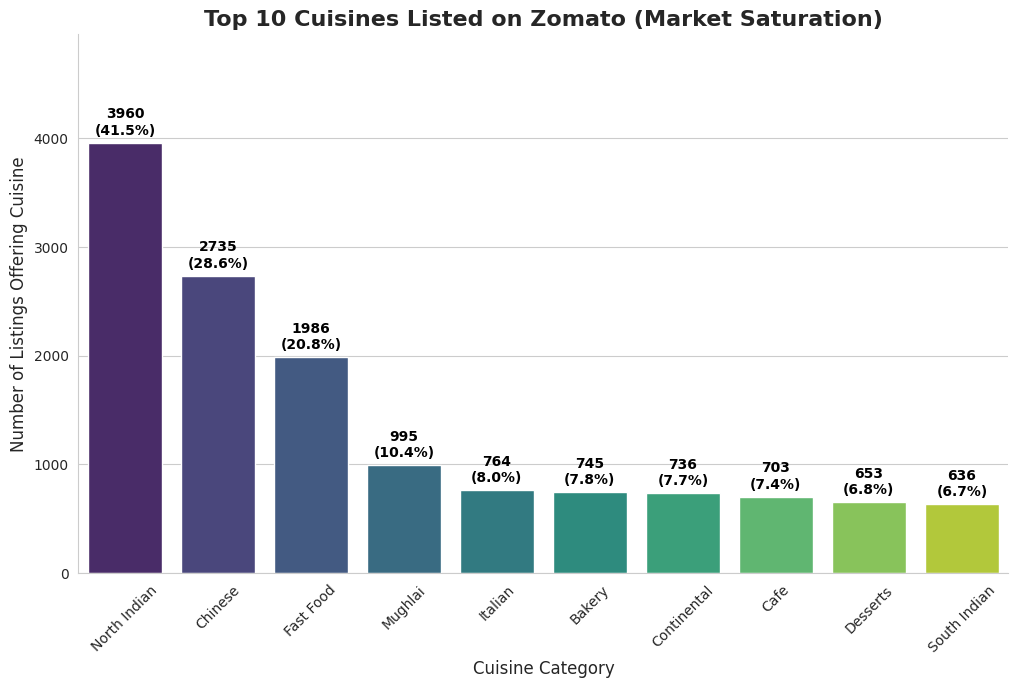

In [155]:
cuisine_list = join_df['Cuisines'].fillna('Unknown').str.split(', ')
all_cuisines = [cuisine for sublist in cuisine_list for cuisine in sublist]
cuisine_counts = pd.Series(all_cuisines).value_counts().head(10)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')
total_restaurants = len(join_df)

for i, count in enumerate(cuisine_counts.values):
    pct_penetration = (count / total_restaurants) * 100
    ax.text(i, count + 50, f'{count}\n({pct_penetration:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title('Top 10 Cuisines Listed on Zomato (Market Saturation)', fontsize=16, fontweight='bold')
plt.xlabel('Cuisine Category', fontsize=12)
plt.ylabel('Number of Listings Offering Cuisine', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, cuisine_counts.values.max() + 1000)
sns.despine()

plt.show()

• North Indian cuisine is the undisputed market leader, appearing in the highest number of listings. It is the "bread and butter" of the platform.<br>
• This category drives the highest volume of orders but also faces the highest competition. For a new restaurant partner entering this space, Zomato needs to offer aggressive advertising packages (e.g., "Sponsored Listings") because organic visibility is difficult in such a crowded category.<br>
• Chinese cuisine consistently ranks second across most price tiers.<br>
• This reflects the strong Indian preference for "Desi Chinese" as a comfort food option. It bridges the gap between "Casual Dining" (Medium Price) and "Premium" (High Price) categories.<br>
• Fast Food ranks highly, particularly dominating the Low Price segment.
• While North Indian and Chinese dominate the mass market, Italian cuisine emerges as a key player specifically in the "Very High" (Premium) price tier. This niche is small in volume but high in value (AOV).

###Cuisines vs. Price Tiers

Finally, we explore which cuisines are common in each price range. Since each restaurant can have multiple cuisines listed (e.g., “Italian, Chinese”), we split and count them:

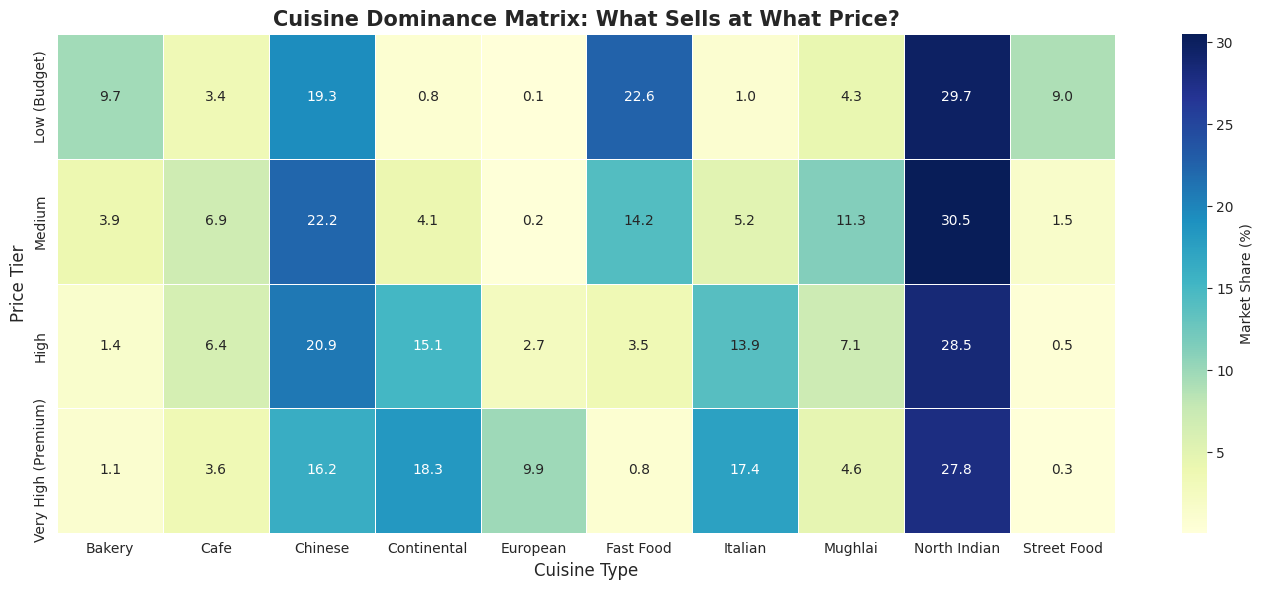

In [157]:
join_df['Cuisines'] = join_df['Cuisines'].fillna('Unknown')
cuisine_exploded = join_df.assign(Cuisine=join_df['Cuisines'].str.split(', ')).explode('Cuisine')

# 2. Define Price Categories clearly
price_map = {1: 'Low (Budget)', 2: 'Medium', 3: 'High', 4: 'Very High (Premium)'}
cuisine_exploded['Price Category'] = cuisine_exploded['Price range'].map(price_map)

# 3. Smart Selection (The Fix)
# Instead of top global cuisines, we pick the Top 5 cuisines from EACH price tier
# This ensures 'Italian' (Premium) and 'Street Food' (Budget) both appear
selected_cuisines = set()
for price in cuisine_exploded['Price Category'].unique():
    top_in_tier = cuisine_exploded[cuisine_exploded['Price Category'] == price]['Cuisine'].value_counts().head(5).index.tolist()
    selected_cuisines.update(top_in_tier)

# Filter data for only these relevant cuisines
filtered_df = cuisine_exploded[cuisine_exploded['Cuisine'].isin(selected_cuisines)]

# 4. Create a Pivot Table for the Heatmap
# We normalize by 'index' (Price Category) to show the "Percentage Share" within that price range
pivot_table = pd.crosstab(filtered_df['Price Category'], filtered_df['Cuisine'], normalize='index') * 100

# Reorder index for logical flow
pivot_table = pivot_table.reindex(['Low (Budget)', 'Medium', 'High', 'Very High (Premium)'])

# 5. Visualization: Heatmap (Best for Density & Full Data)
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Market Share (%)'})

plt.title("Cuisine Dominance Matrix: What Sells at What Price?", fontsize=15, fontweight='bold')
plt.ylabel("Price Tier", fontsize=12)
plt.xlabel("Cuisine Type", fontsize=12)
plt.tight_layout()
plt.show()

• Users are willing to pay top for "authentic" international experiences. While North Indian is popular everywhere, it shares the premium stage with Italian. If you are launching a luxury restaurant, Italian is a statistically safer bet than Fast Food.<br>
• The budget market is volume-driven and relies on familiarity (North Indian) and convenience (Fast Food). There is almost zero market for "Budget Italian" or "Budget Continental," meaning those cuisines are hard to monetize at a low price point.<br>
• Chinese cuisine maintains a consistent, moderate color intensity across all four rows (Low to Very High).


##Final Conclusion
The data reveals that Zomato (within this snapshot) operates primarily as a hyper-local discovery platform for budget-conscious diners in North India, rather than a global transactional powerhouse. The platform faces a "Service Gap", where the majority of listed restaurants do not yet utilize revenue-generating features like Online Delivery or Table Booking. The immediate business opportunity lies in monetizing the "Listing-Only" inventory and improving the quality of the "Average" rated partners.

## Key Insight
1. Strategic Market Diagnosis<br>
• The "90/10" Geographic Reality: The dataset is heavily skewed, with India accounting for ~94% of all transactions. Within India, the National Capital Region (New Delhi, Gurgaon, Noida) holds a monopoly, contributing over 70% of the records.<br>
    - Conclusion: This dataset cannot be used to model global trends. Business strategies derived here apply strictly to the Indian market. For international markets (USA, UK), Zomato is currently acting purely as a directory (listing service) with zero delivery penetration in this dataset.<br>
• The "Average" Quality Trap: The most common rating category is "Average" (2.5–3.4), covering roughly 40-50% of rated restaurants. Furthermore, ~22% of restaurants have a 0.0 rating ("Not Rated").<br>
    - Conclusion: There is a shortage of "Excellent" dining options (only ~3%). The platform is saturated with mediocre options. The "0.0" ratings represent a "Cold Start" problem—restaurants are listed but have failed to engage customers enough to get a single review.<br>
• The Untapped "Digital Service" Goldmine:<br>
    - Online Delivery: Only ~26% of restaurants offer online delivery.
    - Table Booking: Only ~12% of restaurants offer table booking.
    - Conclusion: Over 6,000 listed restaurants in India alone are not yet monetized via delivery logistics. This is the single largest revenue opportunity: converting these "Discovery-Only" partners into "Delivery" partners.<br>
2. Customer Preference & Unit Economics<br>
• Cuisine Dominance: North Indian cuisine is the undisputed market leader across all price categories. Chinese cuisine acts as the universal "Runner-Up," maintaining popularity from budget street food to premium dining.<br>
    - Premium Pivot: As spending power increases (Price Range 4), consumer preference shifts toward Italian and Continental cuisines. These cuisines drive higher Average Order Value (AOV).<br>
• Price Sensitivity: The market is volume-driven. ~80% of restaurants fall into the Low (Budget) and Medium price categories.<br>
    - Conclusion: "Zomato Gold" (Premium Subscription) appeals to a niche top 20% of the user base. The mass-market strategy must focus on operational efficiency (speed/discounts) rather than premium experiences.<br>

3. Strategic Recommendations (The Action Plan)
1. Aggressive Delivery Onboarding:<br>
    - Target: The ~7,100 restaurants currently marked as Has Online delivery = No.
    - Action: Deploy sales teams to onboard these existing partners onto the delivery network to capture lost transaction revenue.
2. "First 5 Reviews" Campaign:<br>
    - Target: The 2,148 restaurants with Aggregate Rating = 0.0.
    - Action: Implement gamification for users to review these specific unrated restaurants. Moving a restaurant from "Unrated" to "Rated" significantly increases trust and conversion rates.
3. Tier-2 City Expansion:<br>
    - Insight: NCR is saturated. The data shows cities like Pune, Bangalore, and Mumbai are severely underrepresented.
    - Action: Shift acquisition focus from New Delhi (Retention phase) to Tier-2 cities and other metros (Expansion phase).
4. Vendor Quality Program:<br>
    - Insight: 50.5% of restaurants are "Average".
    - Action: Launch B2B consulting services to help "Average" rated partners improve hygiene and service, thereby lifting the platform's overall NPS (Net Promoter Score).

## Future Scope (Data Science Roadmap)
To move beyond descriptive analysis, the following models should be built:<br>
• Success Classification Model: Use features like Votes, Price range, and Cuisines to predict if a new restaurant will be "Successful" (Rating > 4.0) or "Struggling".<br>
• Sentiment Analysis (NLP): Analyze the text reviews to understand why restaurants are rated "Average" is it the food taste or the delivery time?<br>
• Dynamic Pricing Engine: Build a regression model to predict Average Cost for two based on location and cuisine to help new partners set competitive prices.

##Learning Outcome

This project strengthened practical skills in:

Data cleaning and preprocessing

Feature engineering and aggregation

Visualization and storytelling using data

Extracting meaningful business insights from real-world datasets


#👤 Project By

Amaan Khan
📧 Email: amaankhanamaan8@gmail.com